# "Artificial Intelligence Model for Air Quality Prediction and Analysis from IoT Sensor Data"

# Importing Libraries

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
import warnings  
warnings.filterwarnings("ignore")  
  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  
from sklearn.metrics import accuracy_score,confusion_matrix

# Importing Dataset

In [2]:
df=pd.read_csv(r"data.csv",encoding="unicode_escape")
df

stn_code       sampling_date                        state   location  \
0           150  February - M021990               Andhra Pradesh  Hyderabad   
1           151  February - M021990               Andhra Pradesh  Hyderabad   
2           152  February - M021990               Andhra Pradesh  Hyderabad   
3           150     March - M031990               Andhra Pradesh  Hyderabad   
4           151     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                                           agency  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
435737  West Bengal State Pollution Control Board   
435738  West Bengal State Pollution Control Board   
435739                                        NaN   
435740                                        NaN   
435741                                        NaN   

                                      type   so2   no2   rspm  spm  \
0       Residential, Rural and other Areas   4.8  17.4    NaN  NaN   
1                          Industrial Area   3.1   7.0    NaN  NaN   
2       Residential, Rural and other Areas   6.2  28.5    NaN  NaN   
3       Residential, Rural and other Areas   6.3  14.7    NaN  NaN   
4                          Industrial Area   4.7   7.5    NaN  NaN   
...                                    ...   ...   ...    ...  ...   
435737                               RIRUO  22.0  50.0  143.0  NaN   
435738                               RIRUO  20.0  46.0  171.0  NaN   
435739                                 NaN   NaN   NaN    NaN  NaN   
435740                                 NaN   NaN   NaN    NaN  NaN   
435741                                 NaN   NaN   NaN    NaN  NaN   

              location_monitoring_station  pm2_5        date  
0                                     NaN    NaN  1990-02-01  
1                                     NaN    NaN  1990-02-01  
2                                     NaN    NaN  1990-02-01  
3                                     NaN    NaN  1990-03-01  
4                                     NaN    NaN  1990-03-01  
...                                   ...    ...         ...  
435737  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24  
435738  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29  
435739                                NaN    NaN         NaN  
435740                                NaN    NaN         NaN  
435741                                NaN    NaN         NaN  

[435742 rows x 13 columns]

# Data Cleaning & Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [4]:
df.describe()

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

In [5]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code) sampling_date (date of sample collection) state (Indian State) location (location of sample collection) agency type (type of area) so2 (sulphur dioxide concentration) no2 (nitrogen dioxide concentration) rspm (respirable suspended particualte matter concentration) spm (suspended particulate matter) location_monitoring_station pm2_5 (particulate matter 2.5) date (date)

In [6]:
df["state"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Uttar Pradesh',
       'Uttarakhand', 'Uttaranchal', 'West Bengal',
       'andaman-and-nicobar-islands', 'Lakshadweep', 'Tripura'],
      dtype=object)

In [7]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

[]

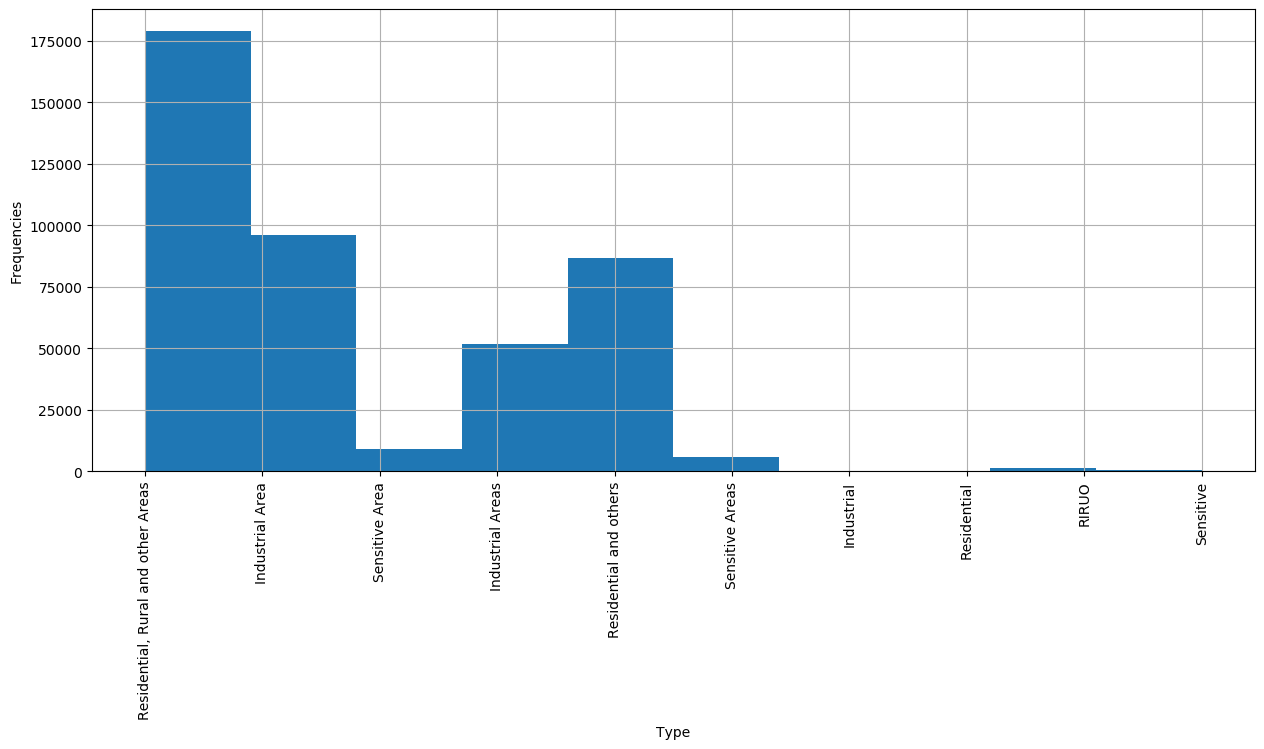

In [9]:
plt.figure(figsize=(15, 6))  
plt.xticks(rotation=90)  
df.type.hist()  
plt.xlabel('Type')  
plt.ylabel('Frequencies')  
plt.plot()

[]

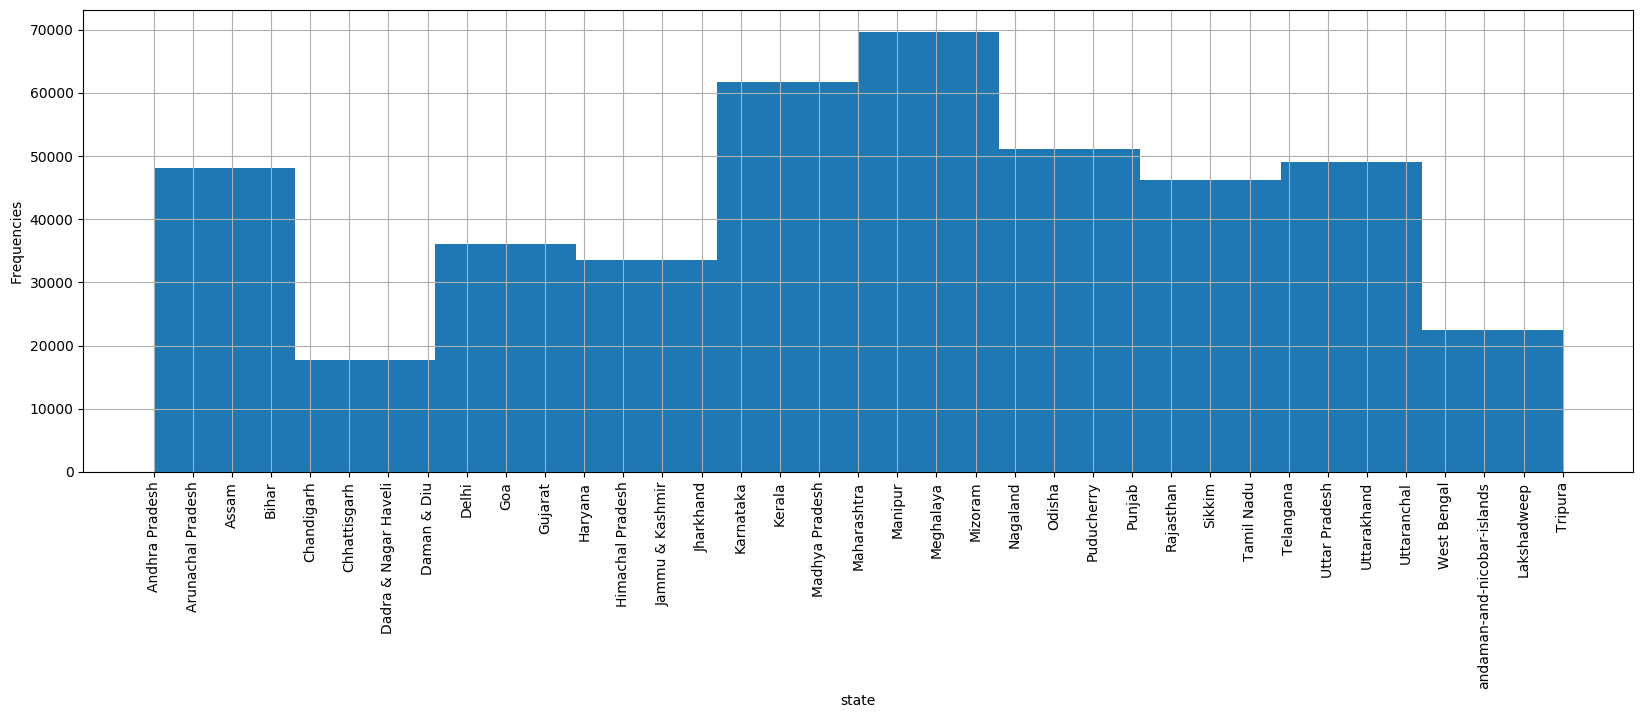

In [10]:
plt.figure(figsize=(20, 6))  
plt.xticks(rotation=90)  
df.state.hist()  
plt.xlabel('state')  
plt.ylabel('Frequencies')  
plt.plot()

In [11]:
df['agency'].value_counts()  

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

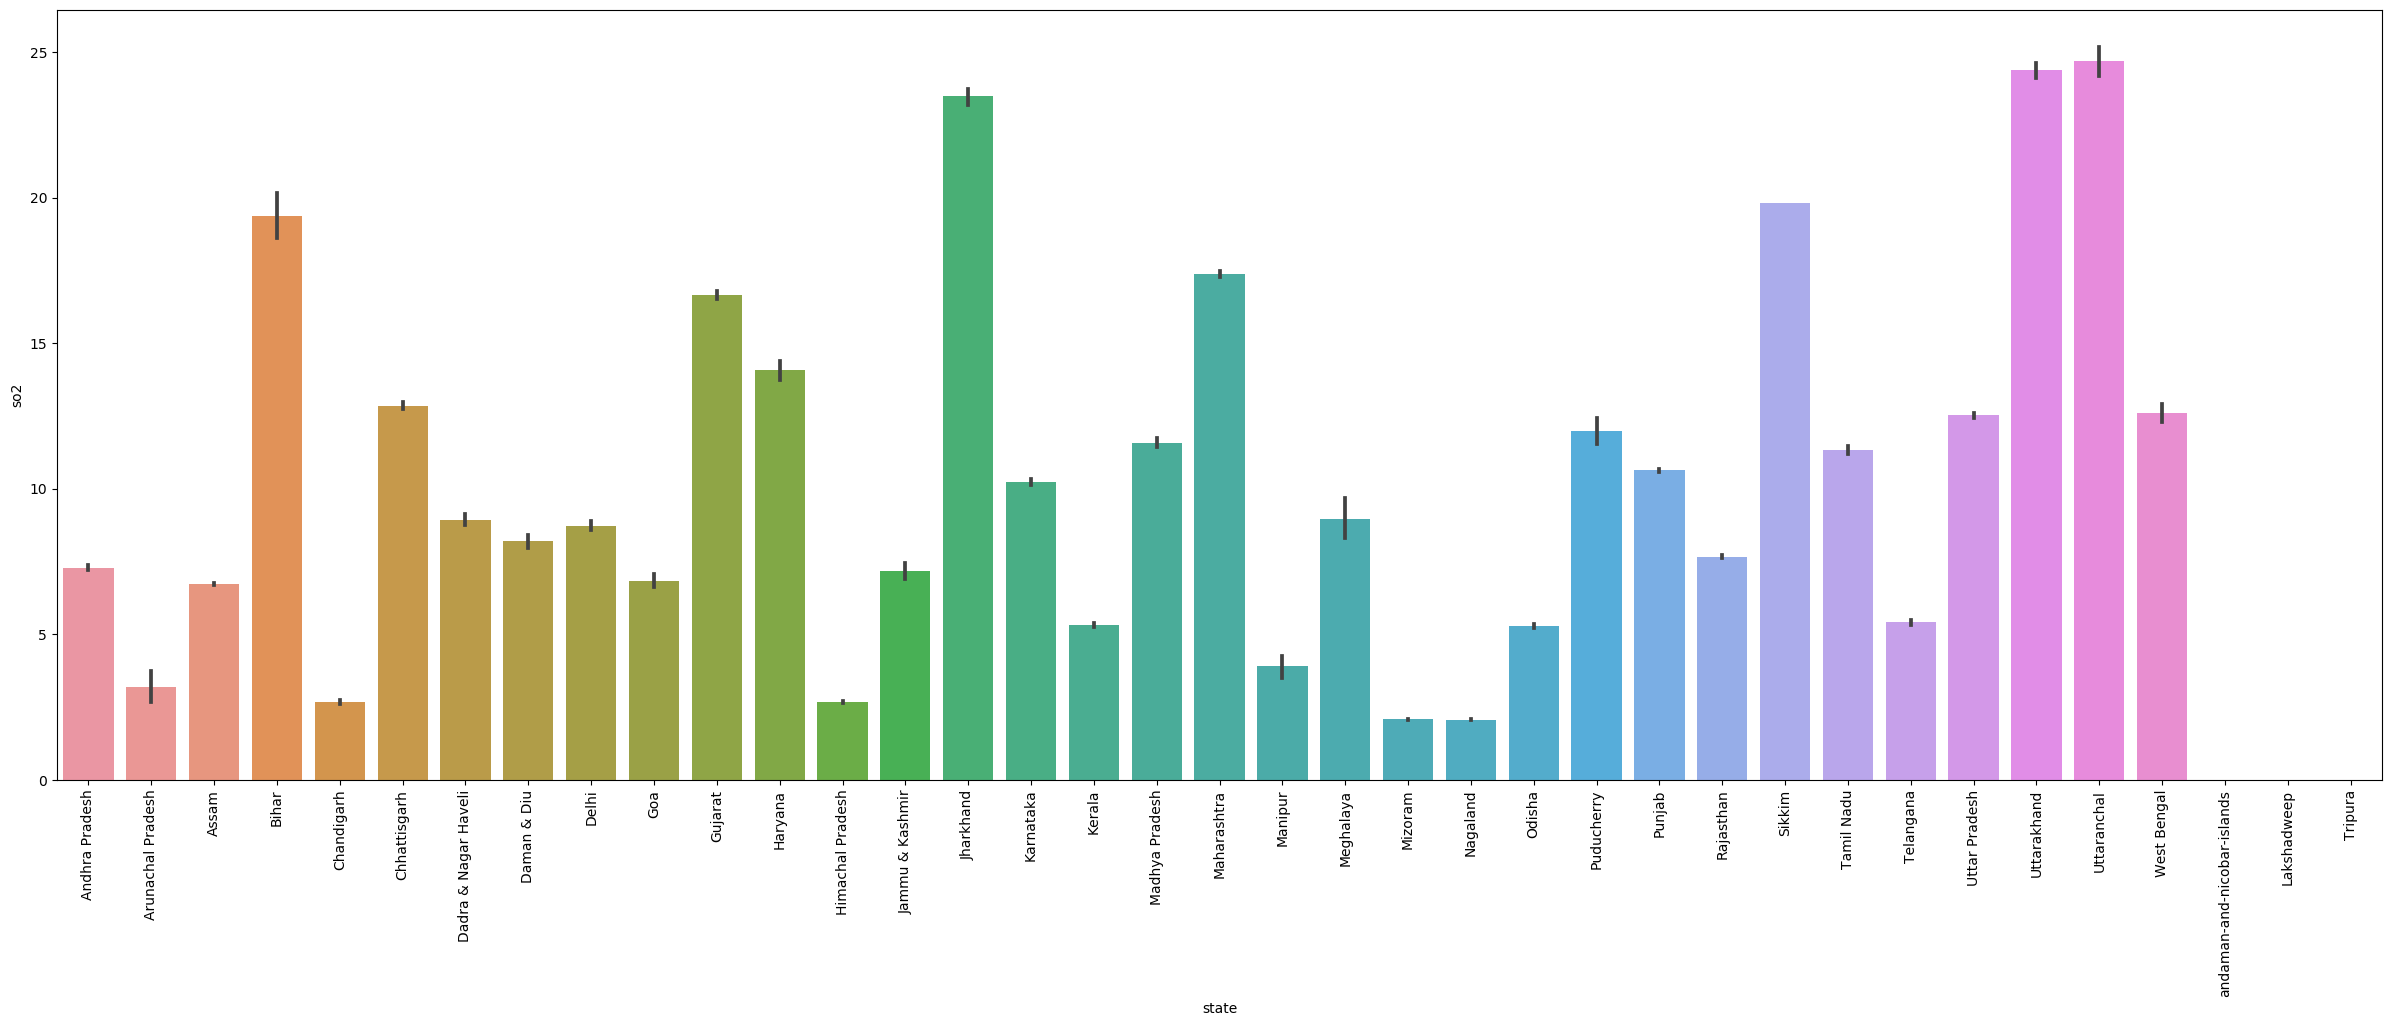

In [12]:
plt.figure(figsize=(30, 10))  
plt.xticks(rotation=90)  
sns.barplot(x='state',y='so2',data=df);

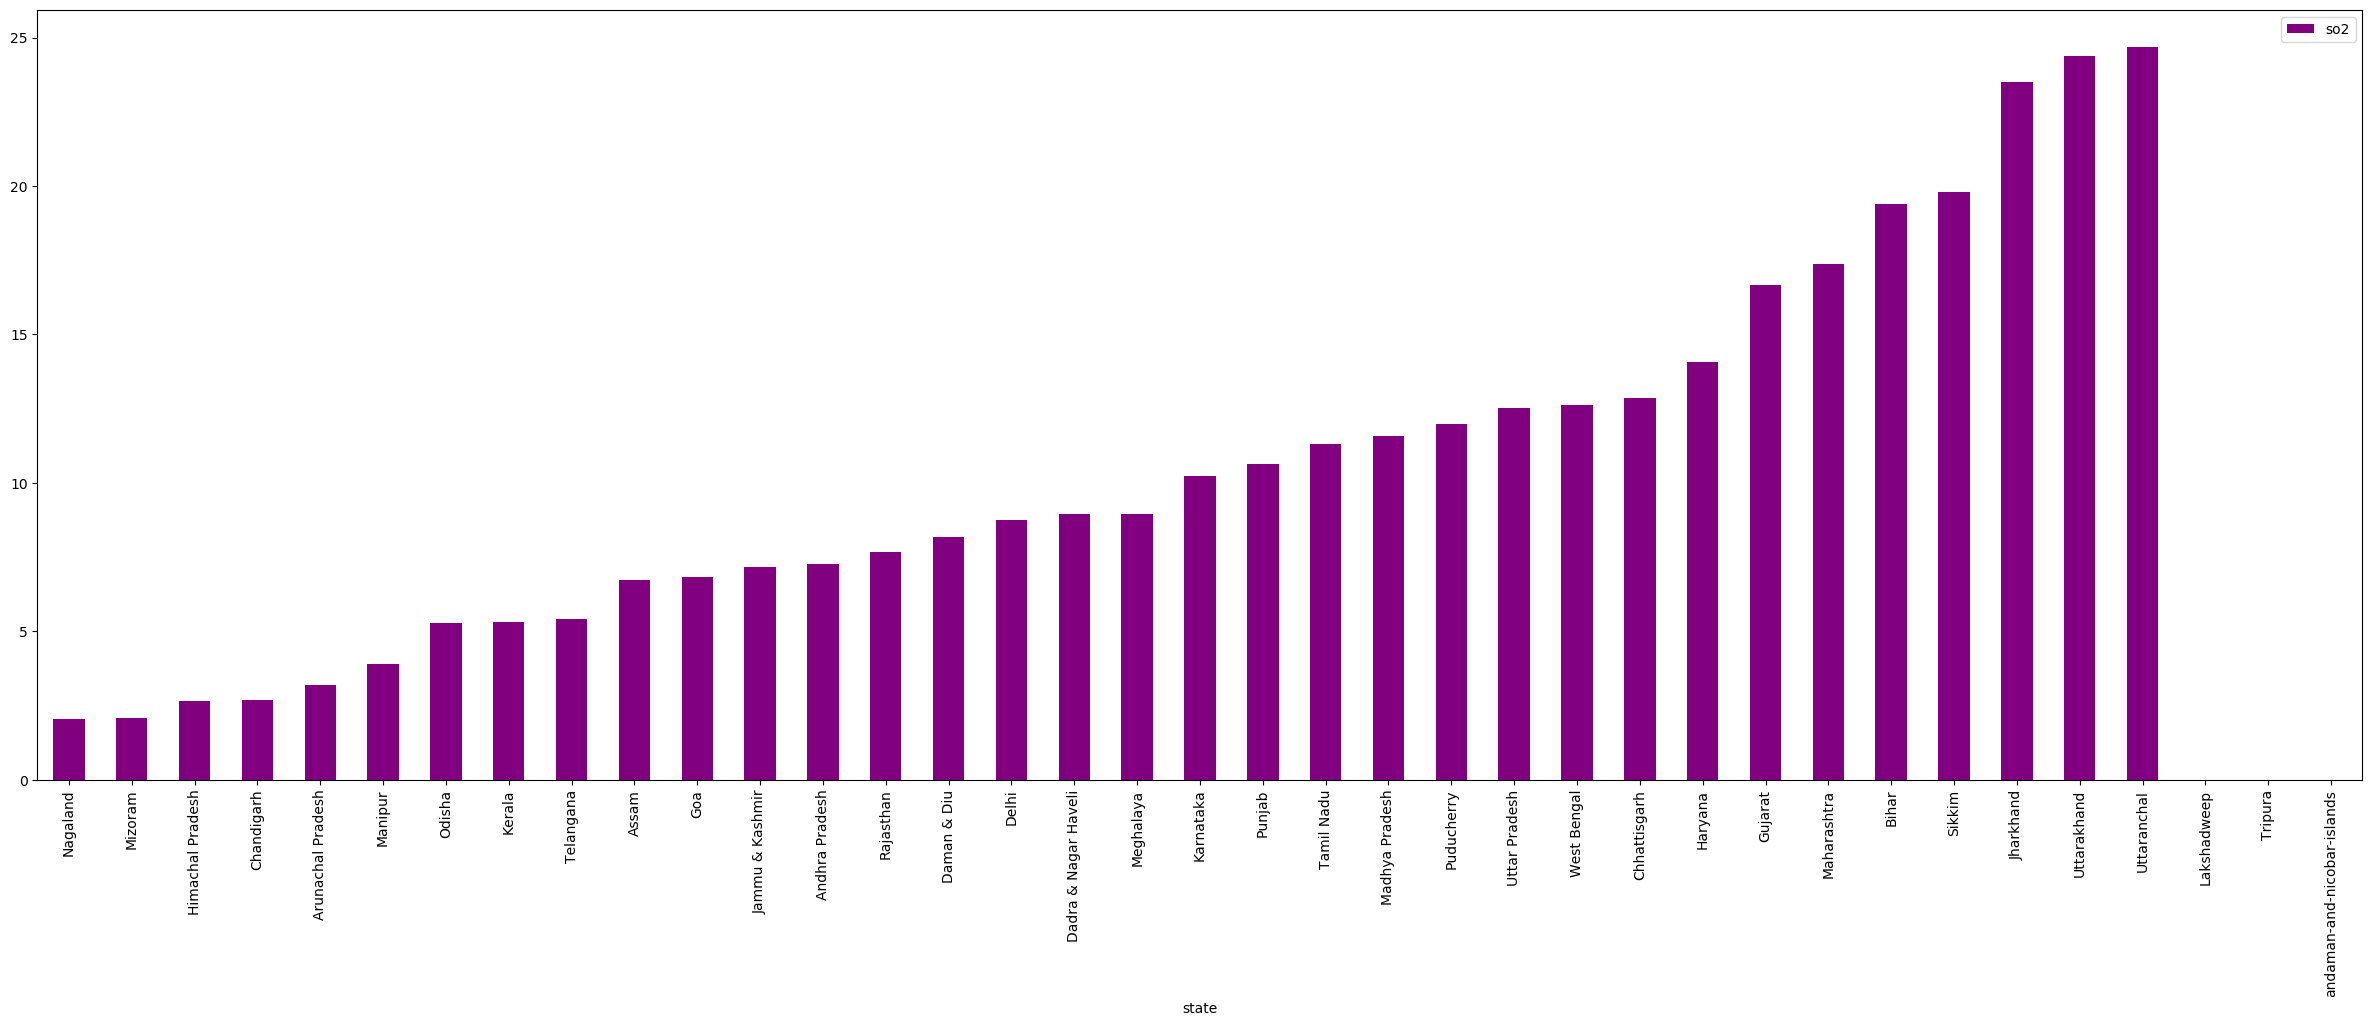

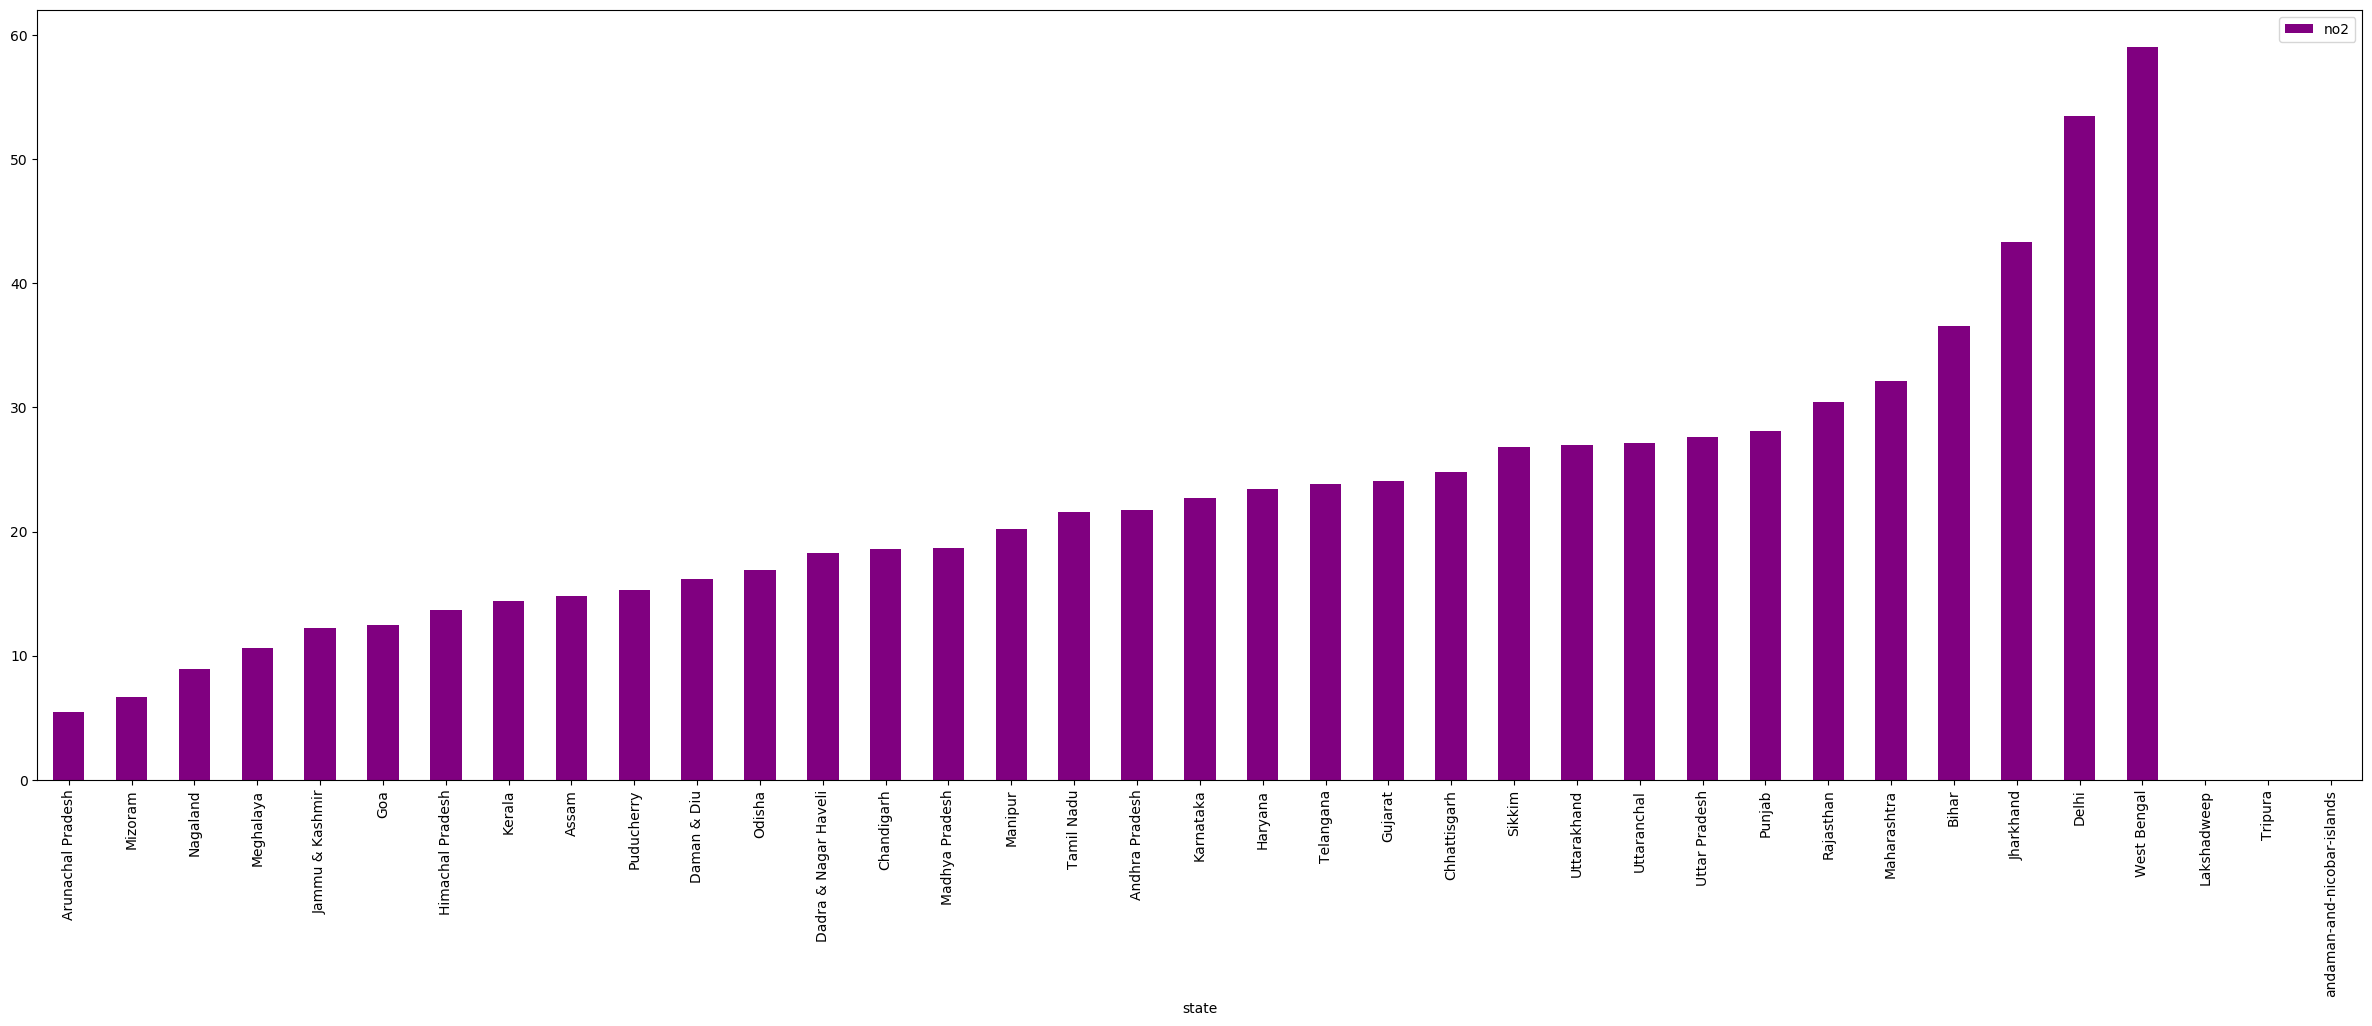

In [13]:
plt.rcParams['figure.figsize']=(30,10)  
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')

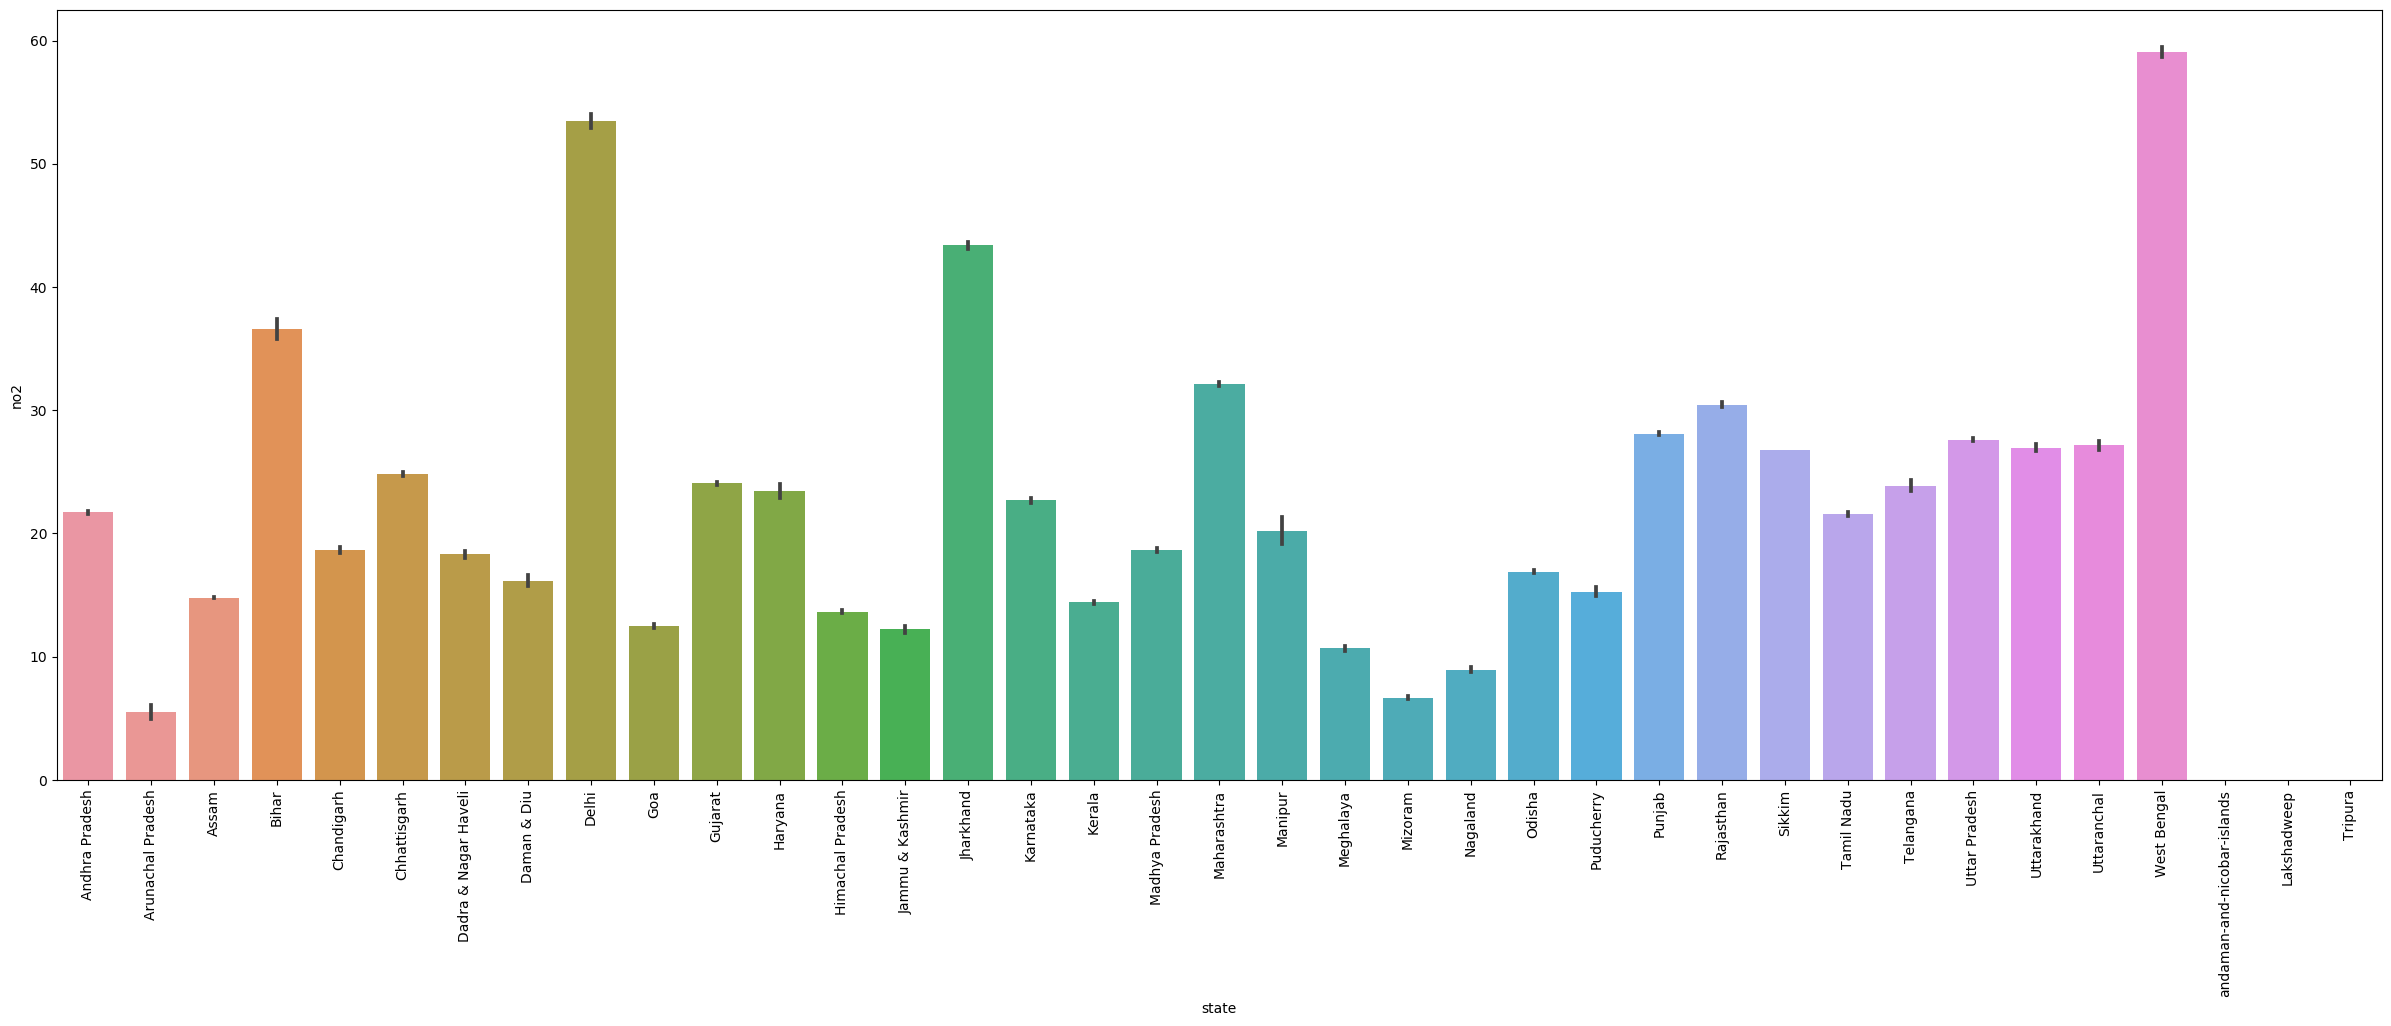

In [14]:
plt.figure(figsize=(30, 10))  
plt.xticks(rotation=90)  
sns.barplot(x='state',y='no2',data=df);  

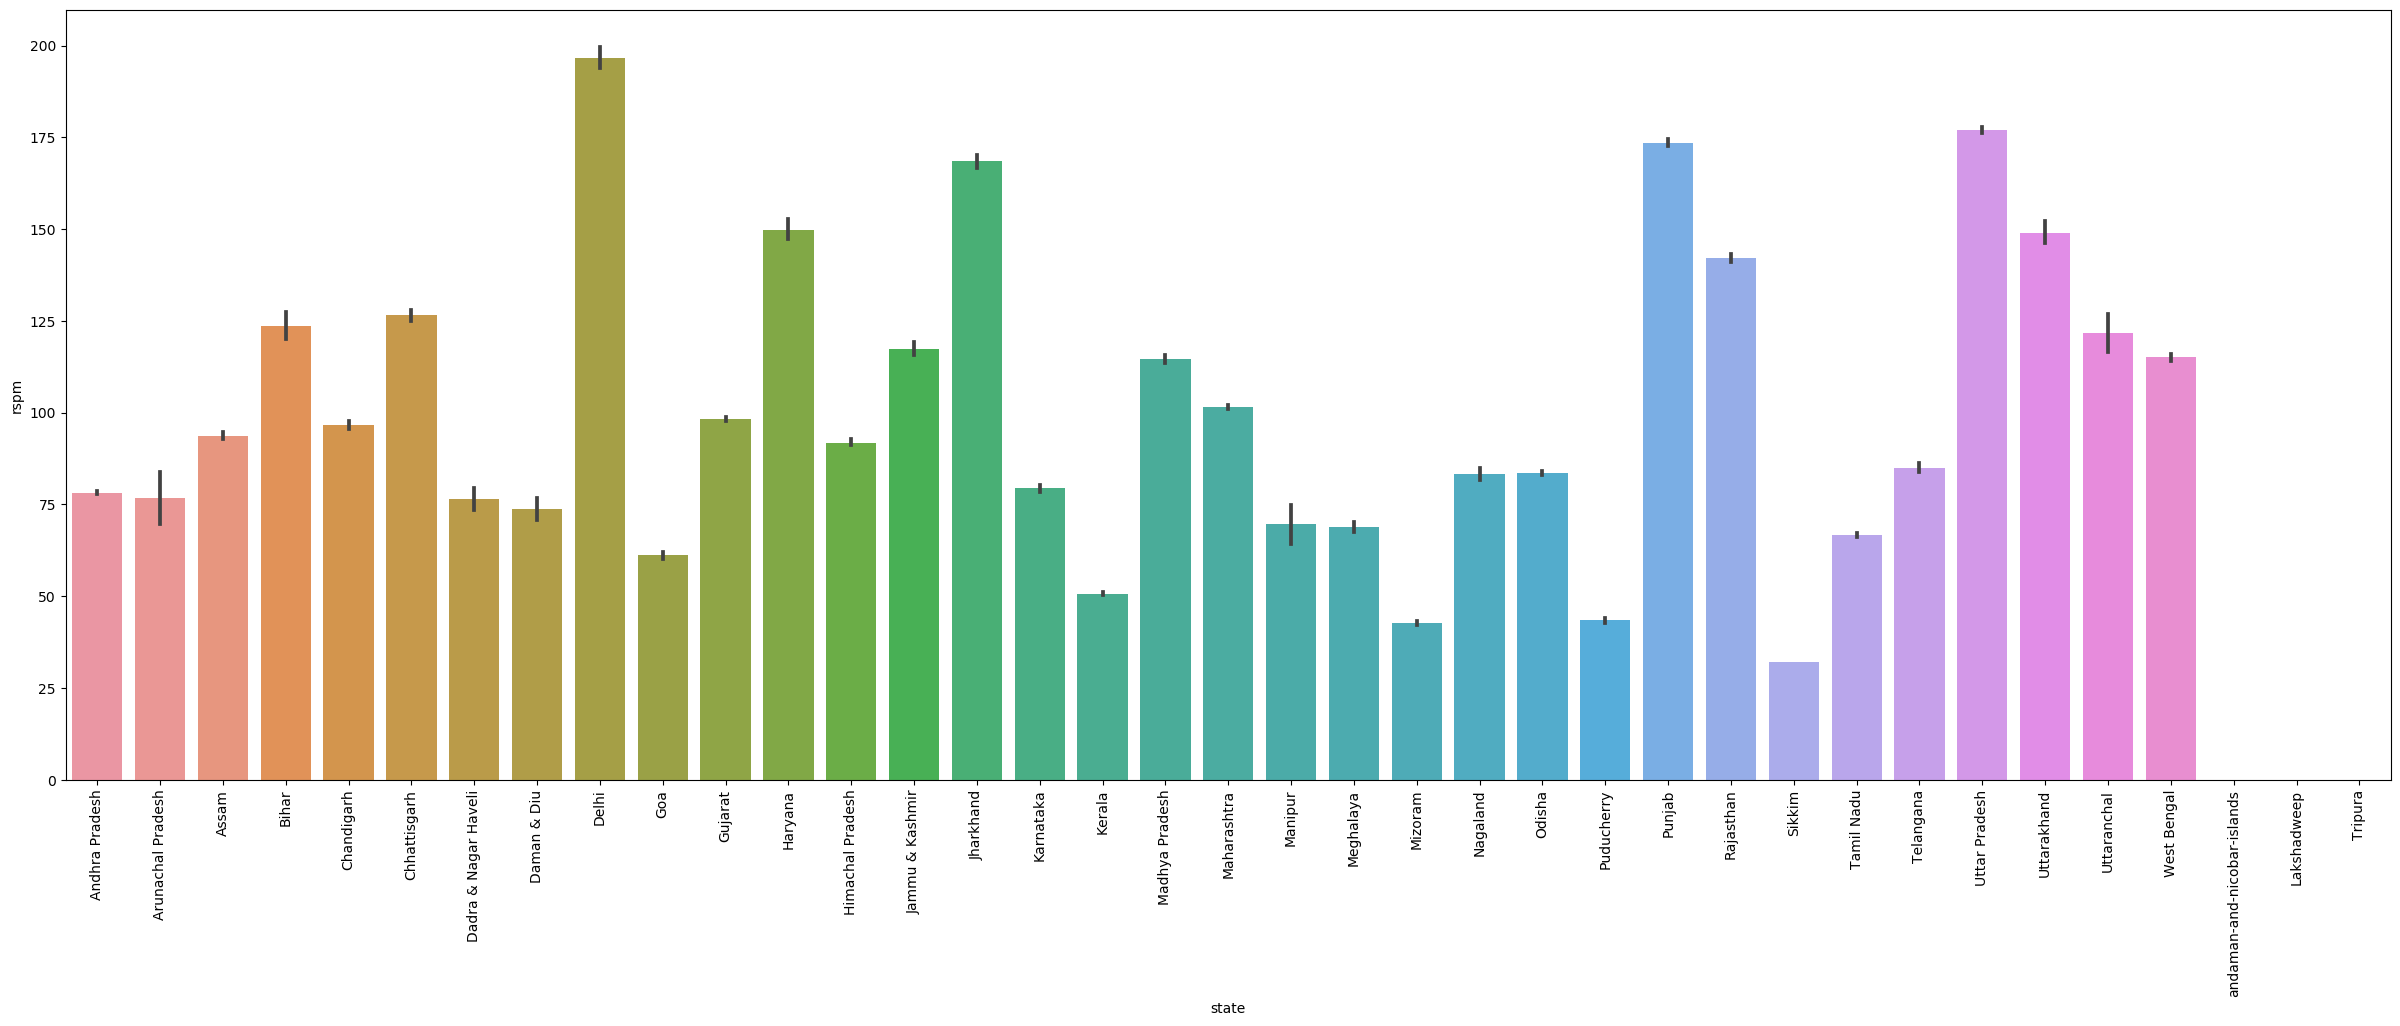

In [15]:
plt.figure(figsize=(30, 10))  
plt.xticks(rotation=90)  
sns.barplot(x='state',y='rspm',data=df);  

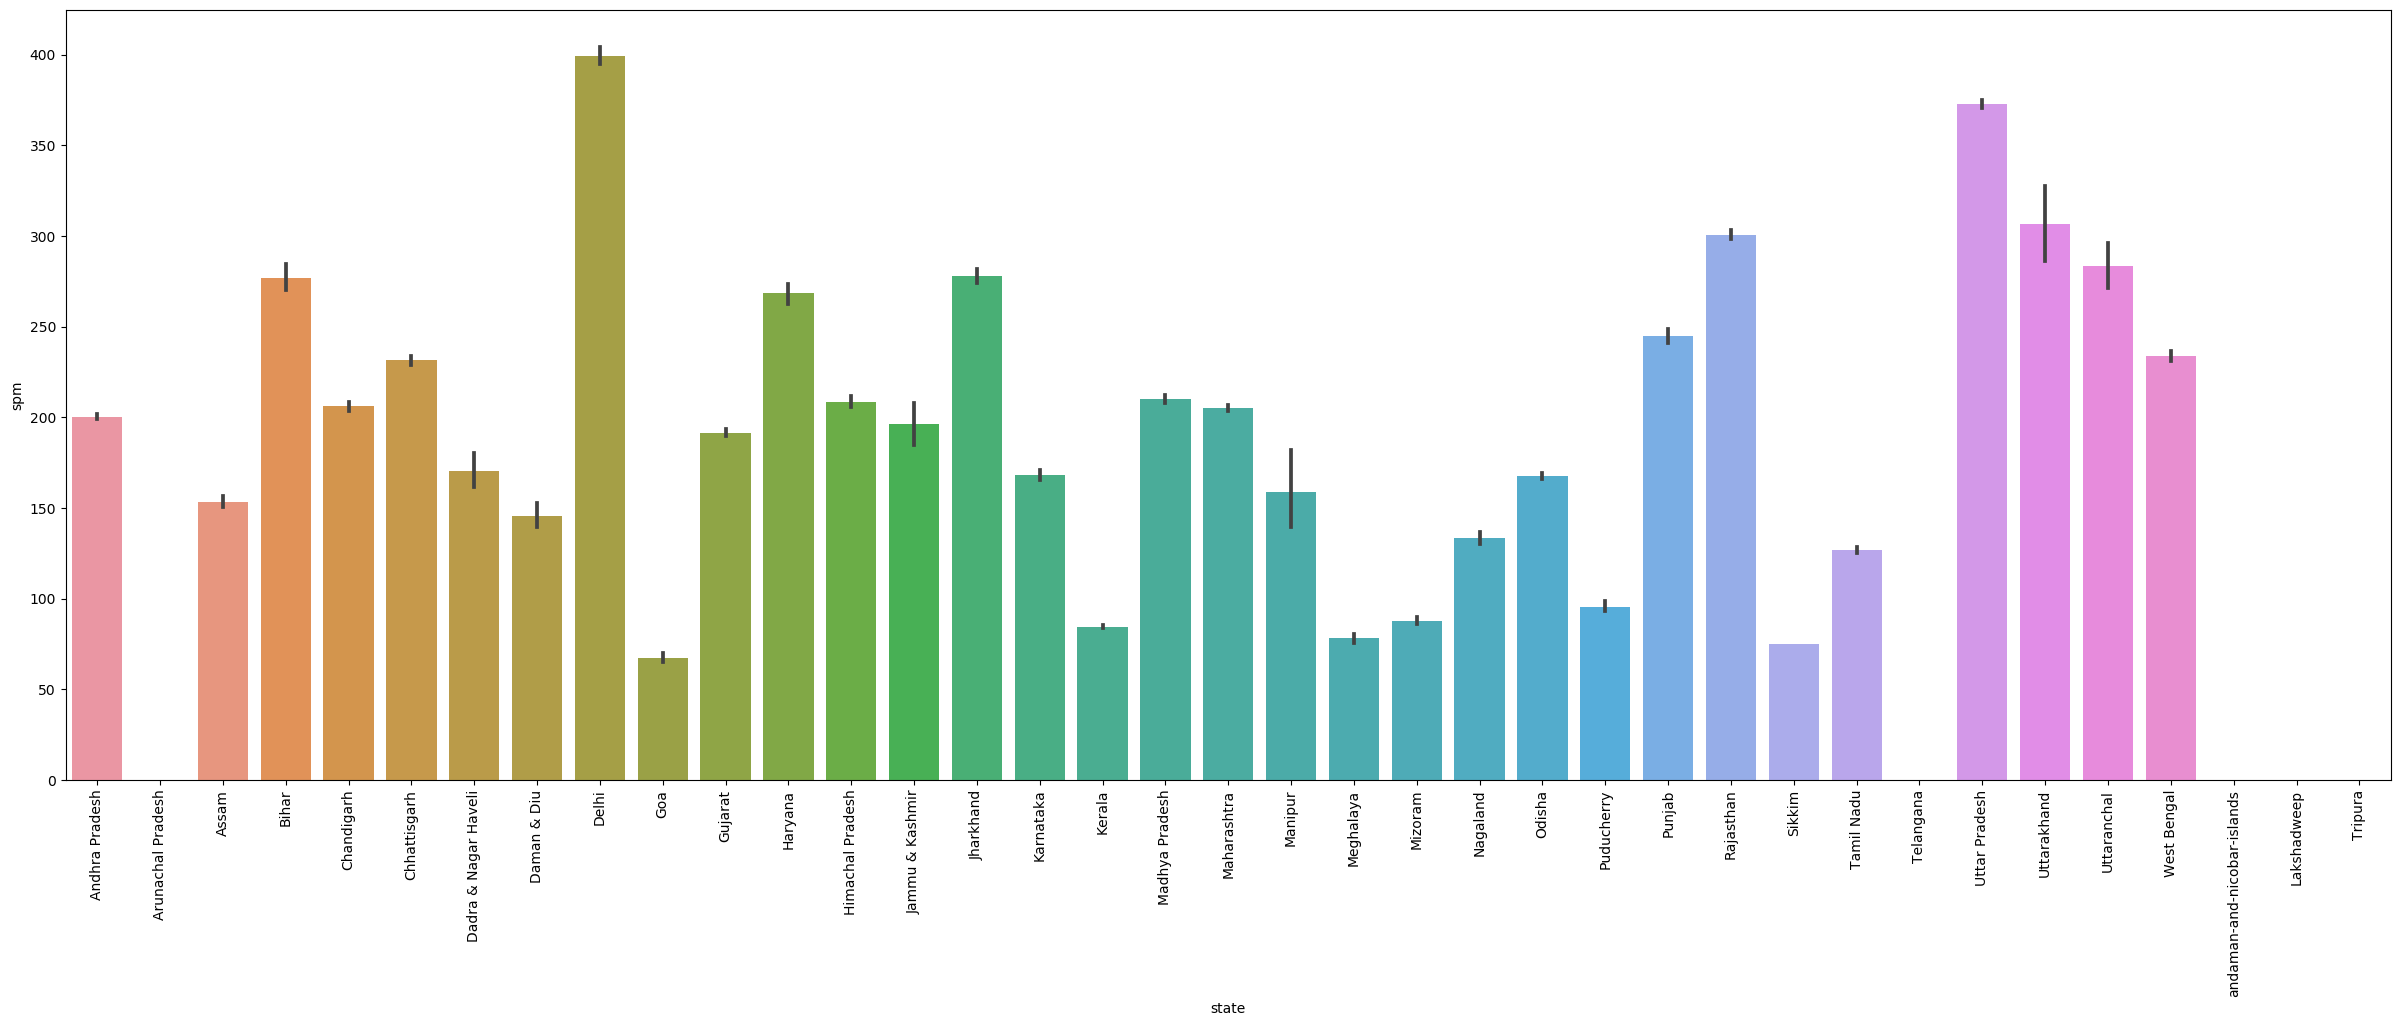

In [16]:
plt.figure(figsize=(30, 10))  
plt.xticks(rotation=90)  
sns.barplot(x='state',y='spm',data=df);  

In [17]:
df.drop(['agency'],axis=1,inplace=True)  
df.drop(['stn_code'],axis=1,inplace=True)  
df.drop(['date'],axis=1,inplace=True)  
df.drop(['sampling_date'],axis=1,inplace=True)  
df.drop(['location_monitoring_station'],axis=1,inplace=True) 

In [18]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [19]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [20]:
df.isnull().sum()

state            0
location         0
type             0
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [21]:
df['so2']=df['so2'].fillna(df['so2'].mean())
df['no2']=df['no2'].fillna(df['no2'].mean())
df['rspm']=df['rspm'].fillna(df['rspm'].std())
df['spm']=df['spm'].fillna(df['spm'].std())

In [22]:
df.isnull().sum()

state            0
location         0
type             0
so2              0
no2              0
rspm             0
spm              0
pm2_5       426428
dtype: int64

In [23]:
df

state   location  \
0                    Andhra Pradesh  Hyderabad   
1                    Andhra Pradesh  Hyderabad   
2                    Andhra Pradesh  Hyderabad   
3                    Andhra Pradesh  Hyderabad   
4                    Andhra Pradesh  Hyderabad   
...                             ...        ...   
435737                  West Bengal   ULUBERIA   
435738                  West Bengal   ULUBERIA   
435739  andaman-and-nicobar-islands   Guwahati   
435740                  Lakshadweep   Guwahati   
435741                      Tripura   Guwahati   

                                      type        so2        no2       rspm  \
0       Residential, Rural and other Areas   4.800000  17.400000   74.87243   
1                          Industrial Area   3.100000   7.000000   74.87243   
2       Residential, Rural and other Areas   6.200000  28.500000   74.87243   
3       Residential, Rural and other Areas   6.300000  14.700000   74.87243   
4                          Industrial Area   4.700000   7.500000   74.87243   
...                                    ...        ...        ...        ...   
435737                               RIRUO  22.000000  50.000000  143.00000   
435738                               RIRUO  20.000000  46.000000  171.00000   
435739  Residential, Rural and other Areas  10.829414  25.809623   74.87243   
435740  Residential, Rural and other Areas  10.829414  25.809623   74.87243   
435741  Residential, Rural and other Areas  10.829414  25.809623   74.87243   

               spm  pm2_5  
0       151.395457    NaN  
1       151.395457    NaN  
2       151.395457    NaN  
3       151.395457    NaN  
4       151.395457    NaN  
...            ...    ...  
435737  151.395457    NaN  
435738  151.395457    NaN  
435739  151.395457    NaN  
435740  151.395457    NaN  
435741  151.395457    NaN  

[435742 rows x 8 columns]

# Function to calculate pollutant index(soi) from so2

In [24]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    elif (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    elif (so2>1600): 
        si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

so2    SOi
0  4.8  6.000
1  3.1  3.875
2  6.2  7.750
3  6.3  7.875
4  4.7  5.875

# Function to calculate pollutant index(noi) from no2 

In [25]:
def cal_Noi(no2):
    ni=0  
    if(no2<=40):
        ni= no2*50/40  
    elif(no2>40 and no2<=80):  
        ni= 50+(no2-40)*(50/40)  
    elif(no2>80 and no2<=180):  
        ni= 100+(no2-80)*(100/100)  
    elif(no2>180 and no2<=280):  
        ni= 200+(no2-180)*(100/100)  
    elif(no2>280 and no2<=400):  
        ni= 300+(no2-280)*(100/120)  
    else:  
        ni= 400+(no2-400)*(100/120)  
    return ni  
df['Noi']=df['no2'].apply(cal_Noi)  
data= df[['no2','Noi']]  
data.head()  

no2     Noi
0  17.4  21.750
1   7.0   8.750
2  28.5  35.625
3  14.7  18.375
4   7.5   9.375

# Function to calculate pollutant index(rpi) from rspm

In [26]:
def cal_RSPMI(rspm): 
    rpi=0  
    if(rspm<=30):
        rpi=rspm*50/30  
    elif(rspm>30 and rspm<=60):  
        rpi=50+(rspm-30)*50/30  
    elif(rspm>60 and rspm<=90):  
        rpi=100+(rspm-60)*100/30  
    elif(rspm>90 and rspm<=120):  
        rpi=200+(rspm-90)*100/30  
    elif(rspm>120 and rspm<=250):  
        rpi=300+(rspm-120)*(100/130)  
    else:  
        rpi=400+(rspm-250)*(100/130)  
    return rpi  
df['Rpi']=df['rspm'].apply(cal_RSPMI)  
data= df[['rspm','Rpi']]  
data.head()

rspm         Rpi
0  74.87243  149.574767
1  74.87243  149.574767
2  74.87243  149.574767
3  74.87243  149.574767
4  74.87243  149.574767

# Function to calculate pollutant index(spmi) from spm

In [27]:
def cal_SPMi(spm): 
    spi=0  
    if(spm<=50):  
        spi=spm*50/50  
    elif(spm>50 and spm<=100):  
        spi=50+(spm-50)*(50/50)  
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)  
    elif(spm>250 and spm<=350):  
        spi=200+(spm-250)*(100/100)  
    elif(spm>350 and spm<=430):  
        spi=300+(spm-350)*(100/80)  
    else:  
        spi=400+(spm-430)*(100/430)  
    return spi  
     
df['SPMi']=df['spm'].apply(cal_SPMi)  
data= df[['spm','SPMi']]  
data.head()  

spm        SPMi
0  151.395457  134.263638
1  151.395457  134.263638
2  151.395457  134.263638
3  151.395457  134.263638
4  151.395457  134.263638

# function to calculate the air quality index (AQI) of every data value

In [28]:
def cal_aqi(si,ni,rspmi,spmi):  
    aqi=0  
    if(si>ni and si>rspmi and si>spmi):
        aqi=si  
    if(ni>si and ni>rspmi and ni>spmi):  
        aqi=ni  
    if(rspmi>si and rspmi>ni and rspmi>spmi):  
        aqi=rspmi  
    if(spmi>si and spmi>ni and spmi>rspmi):  
        aqi=spmi  
    return aqi  
  
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)  
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]  
data.head()

state    SOi     Noi         Rpi        SPMi         AQI
0  Andhra Pradesh  6.000  21.750  149.574767  134.263638  149.574767
1  Andhra Pradesh  3.875   8.750  149.574767  134.263638  149.574767
2  Andhra Pradesh  7.750  35.625  149.574767  134.263638  149.574767
3  Andhra Pradesh  7.875  18.375  149.574767  134.263638  149.574767
4  Andhra Pradesh  5.875   9.375  149.574767  134.263638  149.574767

In [29]:
def AQI_Range(x):
    if x<=50:  
        return "Good"  
    elif x>50 and x<=100:  
        return "Moderate"  
    elif x>100 and x<=200:  
        return "Poor"  
    elif x>200 and x<=300:  
        return "Unhealthy"  
    elif x>300 and x<=400:  
        return "Very unhealthy."  
    elif x>400:  
        return "Hazardous"  
df['AQI_Range'] = df['AQI'] .apply(AQI_Range)  
df.head()

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

       rspm         spm  pm2_5    SOi     Noi         Rpi        SPMi  \
0  74.87243  151.395457    NaN  6.000  21.750  149.574767  134.263638   
1  74.87243  151.395457    NaN  3.875   8.750  149.574767  134.263638   
2  74.87243  151.395457    NaN  7.750  35.625  149.574767  134.263638   
3  74.87243  151.395457    NaN  7.875  18.375  149.574767  134.263638   
4  74.87243  151.395457    NaN  5.875   9.375  149.574767  134.263638   

          AQI AQI_Range  
0  149.574767      Poor  
1  149.574767      Poor  
2  149.574767      Poor  
3  149.574767      Poor  
4  149.574767      Poor

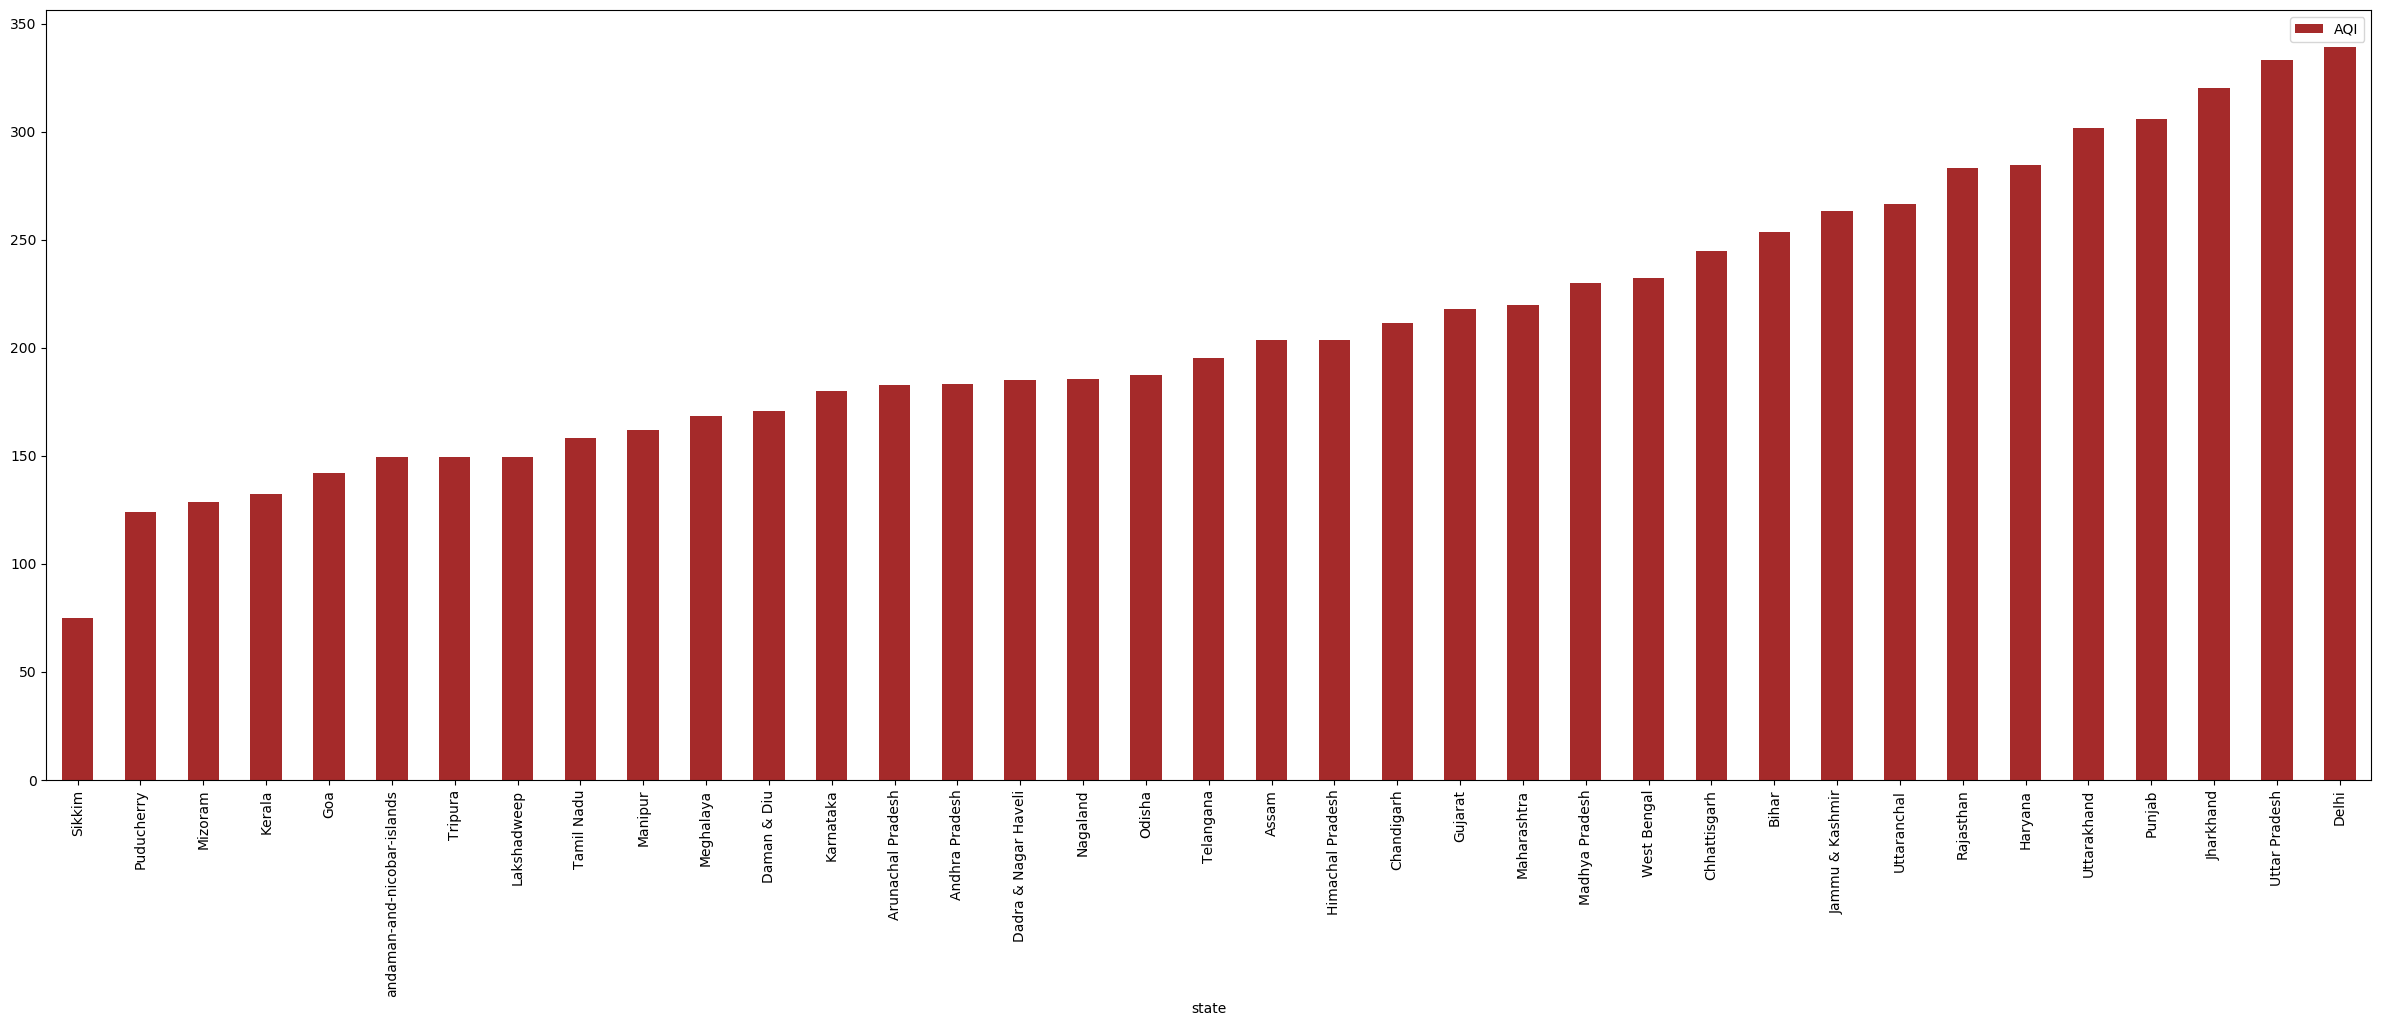

In [30]:
df[['AQI','state']].groupby(["state"]).mean().sort_values(by='AQI').plot.bar(color='brown')

In [31]:
  df['AQI_Range'].value_counts()  

Poor               193607
Very unhealthy.    108487
Unhealthy           71434
Hazardous           32209
Moderate            25060
Good                 4945
Name: AQI_Range, dtype: int64

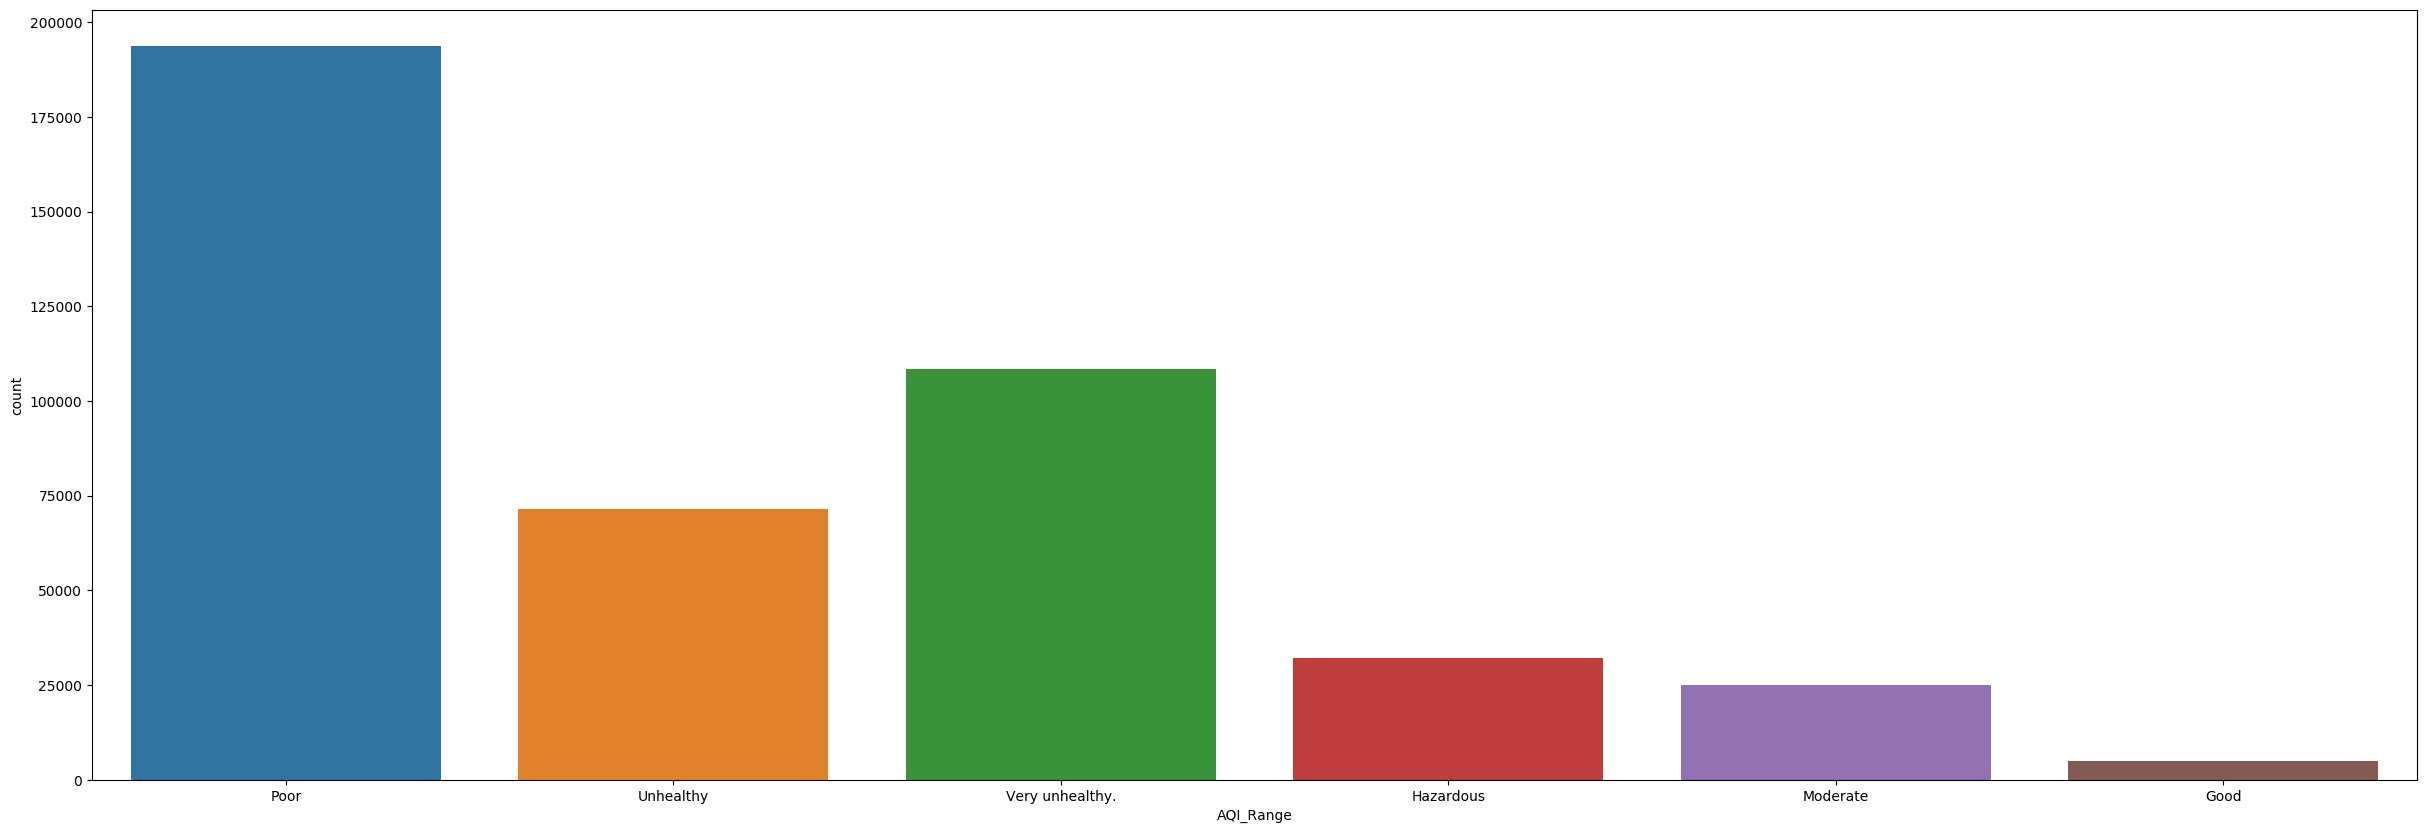

In [32]:
sns.countplot('AQI_Range', data=df)

# Splitting the dataset into Dependent and Independent columns

In [33]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

SOi     Noi         Rpi        SPMi
0  6.000  21.750  149.574767  134.263638
1  3.875   8.750  149.574767  134.263638
2  7.750  35.625  149.574767  134.263638
3  7.875  18.375  149.574767  134.263638
4  5.875   9.375  149.574767  134.263638

In [34]:
Y.head()

0    149.574767
1    149.574767
2    149.574767
3    149.574767
4    149.574767
Name: AQI, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (348593, 4)
The dimension of X_test is (87149, 4)


# MODEL BUILDING

# Linear Regression model

In [36]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred1=model1.predict(X_test)
y_pred1

array([200.67059987, 319.07091151, 121.58772607, ..., 225.85212248,
       220.95370808, 359.7693896 ])

# Performance Evalution

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report

In [39]:
# R_Square Erroe
r2score=r2_score(Y_test,y_pred1)
RMSE=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1)))

print('RSquared error value for Linear Regression Model:',r2score)
print('RMS error value for Linear Regression Model:',RMSE)

RSquared error value for Linear Regression Model: 0.9258879934982615
RMS error value for Linear Regression Model: 29.71758940506008


# Visualling performance of Linear Regression

Text(0.5, 1.0, 'Linear Regression model performance')

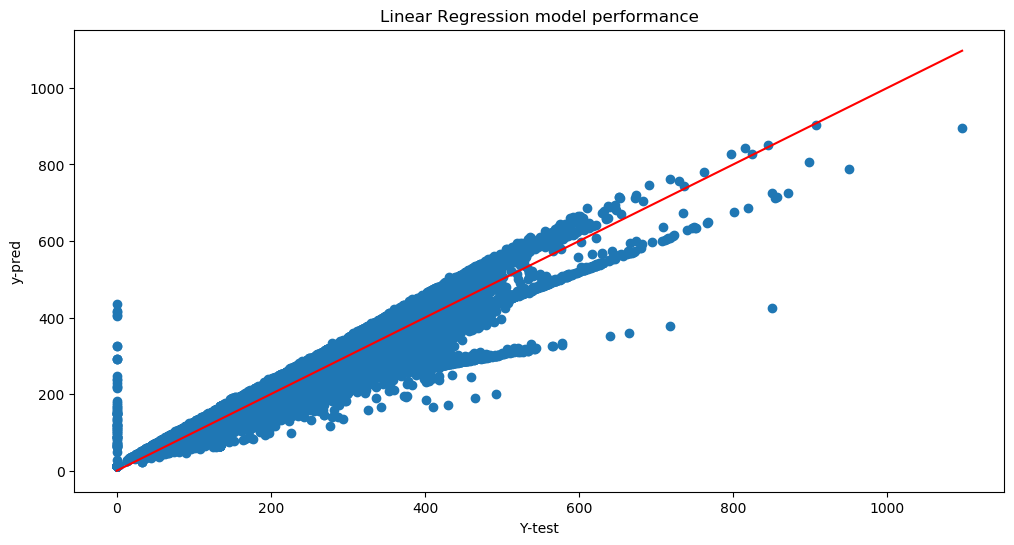

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred1)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Linear Regression model performance")

# Random Forest Regressor model

In [41]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
y_pred2=model2.predict(X_test)
y_pred2

array([183.33333333, 336.15384615, 134.26363724, ..., 206.66666667,
       203.33333333, 325.38461538])

# Performance Evalution

In [45]:
r2score2=r2_score(Y_test,y_pred2)
RMSE2=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

print('RSquared error value for Random Forest Regressor model :',r2score2)
print('RMS error value for Random Forest Regressor model :',RMSE2)

RSquared error value for Random Forest Regressor model : 0.9992969009218102
RMS error value for Random Forest Regressor model : 2.8945266766703304


# Visualling performance of Random Forest Regression

Text(0.5, 1.0, 'Random Forest Regression model performance')

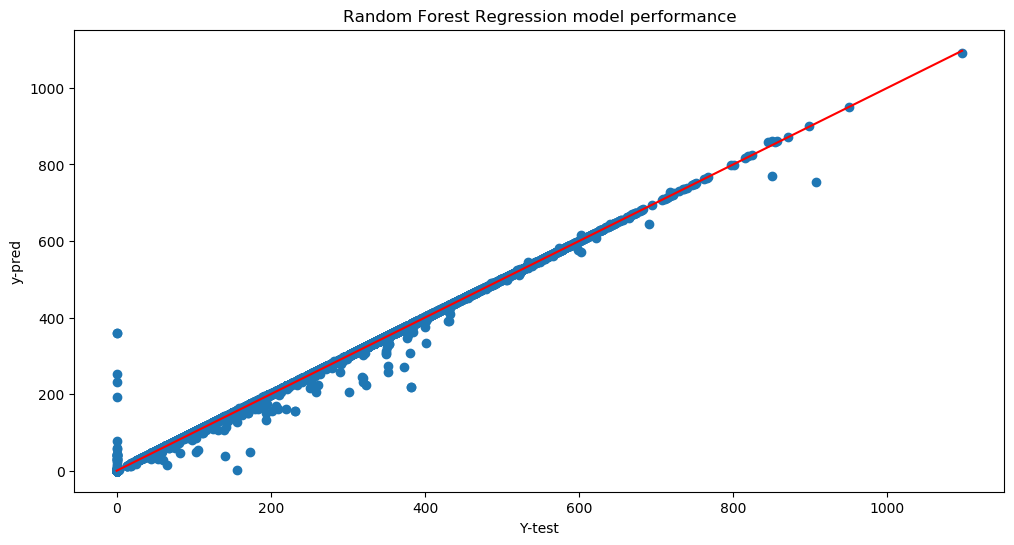

In [47]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred2)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Random Forest Regression model performance")

# Decision Tree Regressor model

In [48]:
model3=DecisionTreeRegressor()
model3.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
y_pred3=model3.predict(X_test)
y_pred3

array([183.33333333, 336.15384615, 134.26363887, ..., 206.66666667,
       203.33333333, 325.38461538])

# Performance Evalution

In [50]:
r2score3=r2_score(Y_test,y_pred3)
RMSE3=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))

print('RSquared error value for Decision Tree Regressor model :',r2score3)
print('RMS error value for Decision Tree Regressor model :',RMSE3)

RSquared error value for Decision Tree Regressor model : 0.9984257404805339
RMS error value for Decision Tree Regressor model : 4.331192199715592


# Visualling performance of Decision Tree Regression

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred3)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.xlabel("Y-test")
plt.ylabel("y-pred")
plt.title("Decession Tree Regression model performance")

In [ ]:
df

# Predicting "Air Quality" by giving new values as input

In [ ]:
SOI=float(input("Enter SOI value= "))
NOI=float(input("Enter NOI value= "))
RPI=float(input("Enter RPI value= "))
SPMI=float(input("Enter SPMI value= "))

new_array=np.array([[SOI,NOI,RPI,SPMI]])
p=model2.predict(new_array)

print("\nprediction\n")
if p<=50:
    AQI="Air Quality is Good"  
elif p>50 and p<=100 :
    AQI="Air Quality is Moderate"  
elif p>100 and p<=200:
    AQI="Air Quality is Poor"  
elif p>200 and p<=300:
    AQI="Air Quality is Unhealthy"  
elif p>300 and p<=400:
    AQI="Air Quality is Very unhealthy."  
elif p>400:
    AQI="Air Quality is Hazardous" 

print("AQI = ",p)
print(AQI)

# Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=70)
# Splitting the data into training and testing data


# Logistic Regression

In [ ]:
#fit the model on train data
log_reg = LogisticRegression()
log_reg.fit(X_train2,Y_train2)

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

In [ ]:
import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score  
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from tkinter import*
from tkinter import filedialog

from PIL import ImageTk, Image


main=Tk()
main.title("Artificial Air Quality Prediction")
main.geometry("1600x1300")
img = ImageTk.PhotoImage(Image.open("Picture2.jpg"))
img_label = Label(main,image=img)
img_label.pack(side = "bottom", fill = "both", expand = "yes")
img_label.place(x=0, y=0)

title=Label(main,text="Artificial Intelligence Model for Air Quality Prediction and Analysis from IoT Sensor Data",justify='center')
title.grid()
font=('times',16,'bold')
title.config(bg='lavender blush', fg='DarkOrchid1')
title.config(font="alderian")
title.config(height=3,width=130)
title.place(x=5,y=5)

def upload():
    global filename
    global dataset
    filename=filedialog.askopenfilename(initialdir="dataset")
    #text.delete('1.0',END)
    text.insert(END,filename+'Loaded\n\n')
    dataset=pd.read_csv(filename,encoding="unicode_escape")
    text.insert(END,str(dataset.head())+'\n\n')
    
    
def analysis():
    sns.countplot(data=dataset)
    text.insert(END,str(dataset.isnull().sum())+'\n\n')
    text.insert(END,str(dataset.info())+'\n')
    text.insert(END,str(dataset.describe())+'\n')
    df.drop(['agency'],axis=1,inplace=True)  
    df.drop(['stn_code'],axis=1,inplace=True)  
    df.drop(['date'],axis=1,inplace=True)  
    df.drop(['sampling_date'],axis=1,inplace=True)  
    df.drop(['location_monitoring_station'],axis=1,inplace=True) 
    df['location']=df['location'].fillna(df['location'].mode()[0])  
    df['type']=df['type'].fillna(df['type'].mode()[0]) 
    df.fillna(0, inplace=True)
    df.isnull().sum() 
    
    
def  split_data():
    X=df[['SOi','Noi','Rpi','SPMi']]
    Y=df['AQI']
    X.head()
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
    print("The dimension of X_train is {}".format(X_train.shape))
    print("The dimension of X_test is {}".format(X_test.shape))
     
    
def model_training():
    model1=LinearRegression()
    model1.fit(X_train,Y_train)
    y_pred1=model1.predict(X_test)
    y_pred1
    
    r2score=r2_score(Y_test,y_pred1)
    RMSE=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred1)))
    print('RSquared error value for Linear Regression Model:',r2score)
    print('RMS error value for Linear Regression Model:',RMSE)
    plt.figure(figsize=(12,6))
    plt.scatter(Y_test,y_pred1)
    plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
    plt.xlabel("Y-test")
    plt.ylabel("y-pred")
    plt.title("Linear Regression model performance")


uploadButton=Button(main,text="Upload Dataset",fg="green",command=upload)
uploadButton.place(x=100,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="Analysis",fg="blue",command=analysis)
uploadButton.place(x=300,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="Data Spliting",fg="black")
uploadButton.place(x=500,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="model bulding",fg="pink")
uploadButton.place(x=700,y=100)
uploadButton.config(font="rog")

uploadButton=Button(main,text="output",fg="brown",command=main.destroy)
uploadButton.place(x=900,y=100)
uploadButton.config(font="rog")
    
font1=('times',12,'bold')
text=Text(main,height=20,width=80)
scroll=Scrollbar(text)
text.place(x=15,y=250)
text.config(font="roboto")
    

main.mainloop()